#STAT 201 Project Proposal

##Introduction

There has been considerable debate regarding the effects of prominent alcohol use on academic performance, such as GPA. While it is challenging to create a direct causal link between the two variables, those within academia have attempted to obtain metrics related to academic performance. Research from the American Economist Journal has suggested that drinking in high school positively correlates with absenteeism rates (Austin, 2012). Furthermore, regarding absenteeism and academic performance, findings presented by the American Educational Research Association indicate that "overall absences are negatively associated with academic achievement" (Klein et al., 2022). While results within academia have shown the link between drinking and absenteeism (and ultimately academic performance), little is known regarding whether or not the timing of drinking affects if students are absent from class. Since school takes place on weekdays, weekday drinking could result in more school absences than weekend drinking. In this project, we would like to explore using the techniques covered in STAT 201. We will utilize a dataset from Kaggle that examines students' academic and socioeconomic attributes across two Portuguese secondary schools ("https://www.kaggle.com/code/marcdeveaux/student-alcohol-consumption/data"). The data set includes the following information that will be utilized in our research (Chauhan, 2022): 
- Workday alcohol consumption - <code>Dalc</code>
- Weekend alcohol consumption - <code>Walc</code>
- Number of school absences - <code>absences</code>

In this case, the number of school absences will serve as our response variable. We will use the mean of our response variable as the parameter and standard deviation as the scale parameter. Considering that the data only measures these variables across two schools in Portugal, our group will utilize both bootstrapping and asymptotics to generate a sampling distribution to mimic the population distribution of all schools in Portugal. The findings of both methods will then be compared with one another. Finally, hypothesis testing will be conducted to answer the research question we mentioned before. Our null hypothesis is that increased levels of weekday alcohol consumption will result in the same amount of school absences as increased alcohol consumption on the weekends. In contrast, our alternative hypothesis, as suggested by our group's aforementioned assumptions by findings from the American Economist Journal (Austin, 2012), is that increased levels of weekday alcohol consumption will result in a higher level of absenteeism compared to increased levels of weekend alcohol consumption. 

##Preliminary Results

We can read the dataset into R using Libraries and read_csv. Then, we clean the data by choosing the columns we are interested in and filtering out any NA rows. We also change column Dalc to workday_ac and column Walc to weekend_ac to clarify the data. 

In [1]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(tidyverse)
library(dplyr)
library(tidyr)
library(tidymodels)
library(gridExtra)
options(repr.matrix.max.rows = 6)


alcohol_data <- read_csv("https://raw.githubusercontent.com/riddhibattu/STAT201/main/Maths.csv") 

head(alcohol_data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ modeldata    1.0.1     ✔ workflows    1.0.0
✔ parsnip      1.0.1     ✔ workflowsets 1.0.0
✔ recipes      1.0.1     ✔ yardstick    1.1.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipe

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


For this project, we only take into consideration of alcohol consumption rating (1-5) greater than 2 since we assume the moderate and above amount of alcohol consumption would cause a difference. Therefore, we filter out any workday alcohol consumption and weekend alcohol consumption that are equal or lower than 2. After cleaning the data, we calculated the mean workday absence and mean weekend absence for alcohol consumption greater than 2. 

We then plotted the workday alcohol consumption level versus the number of absences and the weekend alcohol consumption level versus the number of absences separately. The purpose of the plots is to roughly look at the two plots to see if they are similar or different in their means. The two plots below show that the graph looks similar for workday alcohol consumption and weekday alcohol consumption. The two means also indicate that the absence related to workday alcohol consumption is similar to the absence related to weekend alcohol consumption.

Note: <code>Dalc = workday_ac</code> and 
      <code>Walc = weekend_ac</code>

In [2]:
#choosing the columes we will be working with and drop empty rows
alcohol_data <- alcohol_data %>%
mutate(workday_ac = Dalc) %>%
mutate(weekend_ac = Walc) %>%
select('workday_ac', 'weekend_ac', 'absences') %>%
drop_na() 

head(alcohol_data)

workday_ac,weekend_ac,absences
<dbl>,<dbl>,<dbl>
1,1,6
1,1,4
2,3,10
1,1,2
1,2,4
1,2,10


In [3]:
#mean workday absents with alcohol consumption greater than 2
mean_workday_absents <- alcohol_data %>%
filter(workday_ac >2) %>%
summarize(mean=mean(absences)) %>%
pull(mean)
mean_workday_absents

[1] 7.886364

In [4]:
#mean weekend absents with alcohol consumption greater than 2
mean_weekend_absents <- alcohol_data %>%
filter(weekend_ac >2)  %>%
summarize(mean=mean(absences)) %>%
pull(mean)
mean_weekend_absents

[1] 7.119497

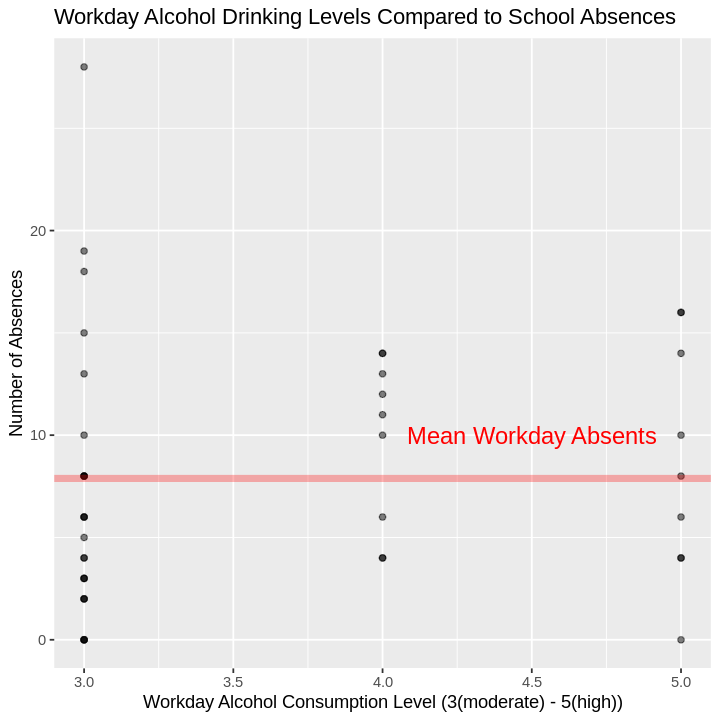

In [5]:
# graph with workday alcohol consumption
options(repr.plot.height = 6, repr.plot.width = 6)
workday_scatterplot <- alcohol_data %>%
    filter(workday_ac >2) %>%
    ggplot(aes(x = workday_ac, y = absences)) +
    geom_point(alpha = 0.5) +
    geom_hline(yintercept = mean_workday_absents, color = "red", alpha=.3, lwd=2) + 
    labs(title = "Workday Alcohol Drinking Levels Compared to School Absences", 
         x = "Workday Alcohol Consumption Level (3(moderate) - 5(high))",
         y = "Number of Absences") +
    theme(text = element_text(size = 11))+
    annotate("text",x = 4.5, y = 10, label = "Mean Workday Absents", color="red", size=5)
workday_scatterplot

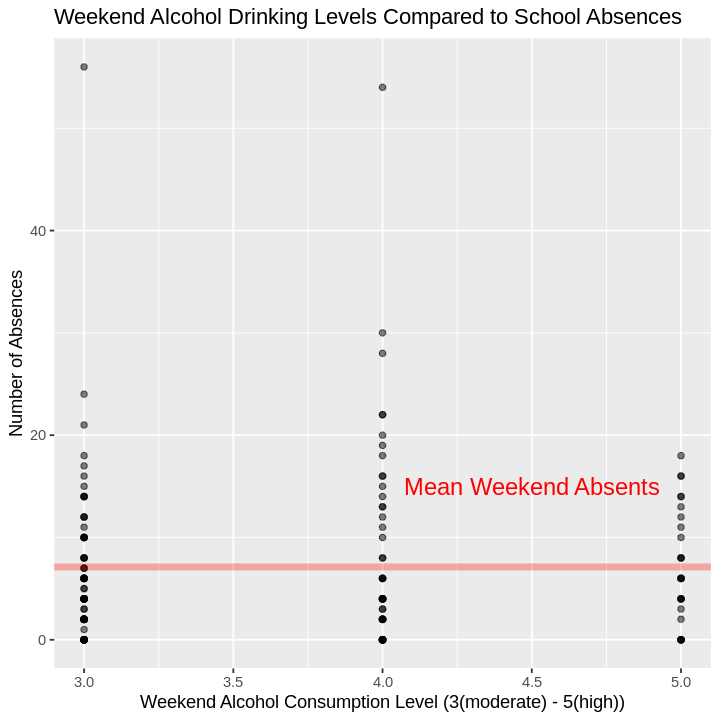

In [6]:
#graph with weekend alcohol consumption
options(repr.plot.height = 6, repr.plot.width = 6)
weekend_scatterplot <- alcohol_data %>%
    filter(weekend_ac >2)  %>%
    ggplot(aes(x = weekend_ac, y = absences)) +
    geom_point(alpha = 0.5) +
    geom_hline(yintercept = mean_weekend_absents, color = "red", alpha=.3, lwd=2) + 
    labs(title = "Weekend Alcohol Drinking Levels Compared to School Absences", 
         x = "Weekend Alcohol Consumption Level (3(moderate) - 5(high))",
         y = "Number of Absences") +
    theme(text = element_text(size = 11)) +
    annotate("text",x = 4.5, y = 15, label = "Mean Weekend Absents", color="red", size=5)
weekend_scatterplot

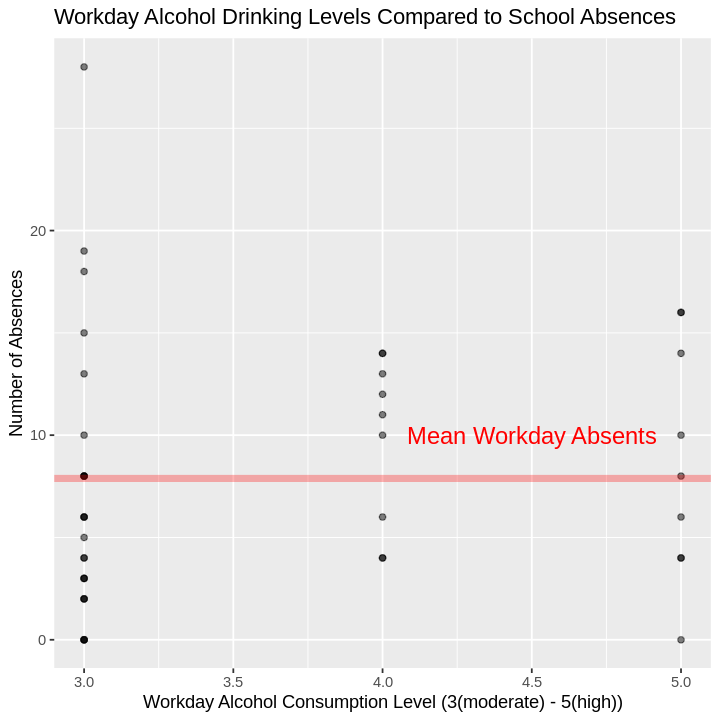

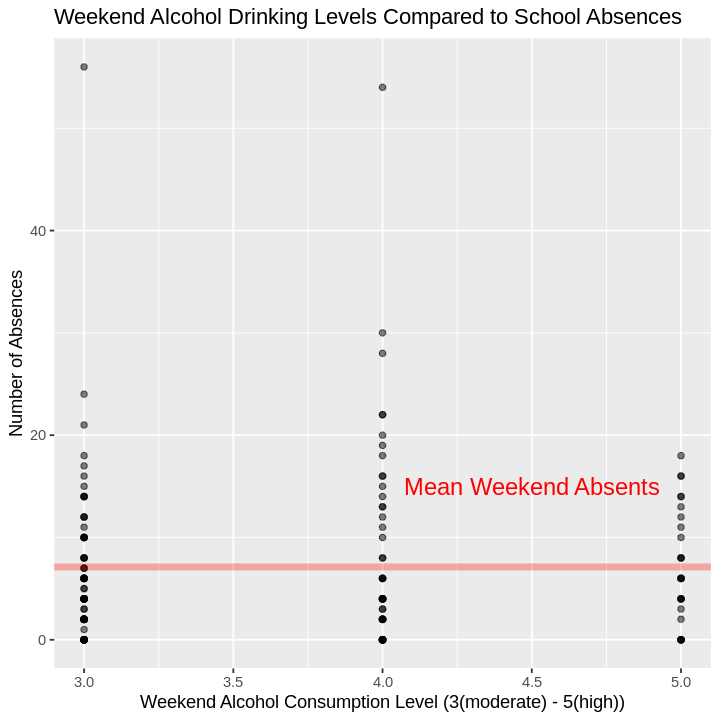

In [7]:
#Plotting the two graphs together.
par(mfrow=c(1,2))
plot(workday_scatterplot)
plot(weekend_scatterplot)


With the two plots, we can see how the mean weekday and weekend and total absences have a very close mean; therefore, our null hypothesis would be true, which can be tested with a hypothesis test using mean and standard deviation along with a t-test.

##Methods and Results

We are using the dataset from UCI Machine Learning Repository, a trustworthy source for datasets. Therefore, the dataset is complete, valid, and reliable for our project. 

The plots above indicate that our null hypothesis could be true if the mean absence due to workday alcohol consumption is equal to the mean absence due to weekend alcohol consumption. However, to decide whether we can reject or fail to reject our hypothesis, we need to do a hypothesis test with the bootstrap method and asymptotic approach to verify using mean and standard deviation along with a student t-test.


1. $H_0: \mu_{workday_{ac}} = \mu_{weekday_{ac}} $
2. $H_A: \mu_{workday_{ac}} \neq \mu_{weekday_{ac}} $

We will use both bootstrap methods to resample for the null distribution: the absence of students who consume minimum alcohol. Then, we will use an asymptotic approach to calculate the 95% confidence interval for the mean. We can use an asymptotic approach because the size of our data is large enough, the samples are taken independently, and the estimator used is random.

In this project, we expect to use the hypothesis test to find if there is a correlation between alcohol consumption and student attendance. The purpose of this project is to help students find out if there is such a correlation. If yes, students can refer to the result for a better work-life balance plan. In the future, we can test if there is a correlation between student attendance and academic success to investigate further the correlation between drinking and students’ academic performance.



##Discussion

##Reference

Austin, W. A. (2012). THE EFFECTS OF ALCOHOL USE ON HIGH SCHOOL ABSENTEEISM. 
    American Economist, 57(2), 238-252. 
    Retrieved from https://www.proquest.com/scholarly-journals/effects-alcohol-use-on-high-school-absenteeism/docview/1113789486/se-2

Chauhan, A. (2022, September 15). Alcohol effects on study. Kaggle. 
    Retrieved November 4, 2022, from https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study 

Klein, M., Sosu, E. M., & Dare, S. (2022). School Absenteeism and Academic Achievement: Does the Reason for Absence Matter? 
    AERA Open, 8. https://doi.org/10.1177/23328584211071115